## I. Distributions and probabilities:

In [7]:
import numpy as np                                     # Matlab like syntax for linear algebra and functions
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys                                             # Module to see files and folders in directories
from scipy import stats
from scipy.integrate import quad, dblquad

In [8]:
sys.path.append('../External_Functions')
from ExternalFunctions import nice_string_output, add_text_to_ax   # Useful functions to print fit results on figure

### 1.1 (8 points) The scores of two tests (A & B) are both Gaussianly distributed with mu = 50, sigma = 20.

In [27]:
# Define your variables
mu = 50
sigma = 20

save_plots = True

In [32]:
# Define your PDF / model 
def gauss_pdf(x):
    """Normalized Gaussian"""
    return 1 / np.sqrt(2 * np.pi) / sigma * np.exp(-(x - mu) ** 2 / 2. / sigma ** 2)

What fraction of students will get a score in test A in the range [55,65]?

In [33]:
xmin = 55
xmax = 65

prob_55_65 = quad(gauss_pdf, xmin, xmax)
print('Fraction of students with a score in test A in the range [55,65]:', prob_55_65)

Fraction of students with a score in test A in the range [55,65]: (0.1746663219402081, 1.939185722446092e-15)


What uncertainty on the mean score do you obtain from 120 B test scores?

In [62]:
N_gauss = 120           # Number of gaussian numbers used in sum
e_mean = sigma / np.sqrt(N_gauss)
print('Error on mean:', e_mean)

Error on mean: 1.8257418583505538


In [ ]:
# Generating numbers according to a Gaussian distribution
x_gauss = np.random.normal(mu, sigma, N_gauss)
x_gauss = np.round(x_gauss)

In [60]:
bins = 20
binwidth = 5

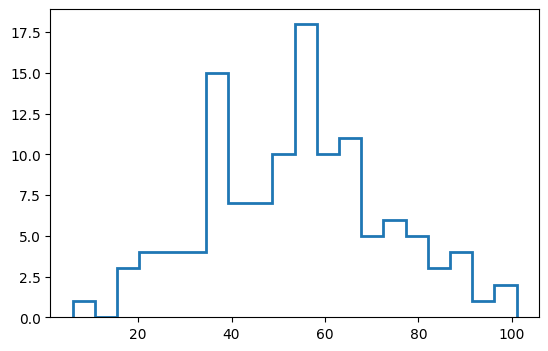

In [61]:
fig2, ax2 = plt.subplots(figsize=(6.3, 4));
counts, bin_edges, _ = ax2.hist(x_gauss, bins, histtype='step', linewidth=2) #range=(xmin, xmax),
bin_centers = (bin_edges[1:] + bin_edges[:-1])/2
s_counts = np.sqrt(counts)

What fraction should get a score above 70 in both tests if rho_A,B = 0? If rho_A,B = 0.75?

In [68]:
mu_A = 50
mu_B = 50
sigma_A = 20
sigma_B = 20
rho_AB1 = 0
rho_AB2 = 0.75

In [76]:
f_AB1 = lambda y, x: (1 / (2*np.pi*sigma_A*sigma_B * np.sqrt(1 - rho_AB1**2))) * np.exp(-(1 / (2*(1 - rho_AB1**2)))*(((x - mu_A) / sigma_A)**2 + ((y - mu_B) / sigma_B)**2 - 2*rho_AB1*((x - mu_A) / sigma_A)*((y - mu_B) / sigma_B)))
f_AB2 = lambda y, x: (1 / (2*np.pi*sigma_A*sigma_B * np.sqrt(1 - rho_AB2**2))) * np.exp(-(1 / (2*(1 - rho_AB2**2)))*(((x - mu_A) / sigma_A)**2 + ((y - mu_B) / sigma_B)**2 - 2*rho_AB2*((x - mu_A) / sigma_A)*((y - mu_B) / sigma_B)))

In [78]:
Amin = 70
Amax = np.inf
Bmin = 70
Bmax = np.inf

prob_AB1 = dblquad(f_AB1, Amin, Amax, Bmin, Bmax)
print('Fraction with a score above 70 in both tests if rho_A,B = 0:', prob_AB1)

prob_AB2 = dblquad(f_AB2, Amin, Amax, Bmin, Bmax)
print('Fraction with a score above 70 in both tests if rho_A,B = 0.75:', prob_AB2)

Fraction with a score above 70 in both tests if rho_A,B = 0: (0.025171490402173154, 1.3712975217834855e-08)
Fraction with a score above 70 in both tests if rho_A,B = 0.75: (0.09045696991297436, 1.485956786994811e-08)


C:\Users\nan25\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


### 1.2 (4 points) At the roulette you get 12/37 winning chances if you play douzaine (e.g. 1-12).

If you play douzaine 20 times, what is the chance that you will win 8 or more times?

In [15]:
def factorial(num):
    factorial = 1

    if num == 0:
        factorial = 1
    else:
        for i in range(1, num + 1):
            factorial = factorial*i
    return factorial

def binomial(m, n, p):
    C = factorial(n) / (factorial(m) * factorial(n-m))
    return p**m * (1 - p)**(n - m) * C 

In [18]:
prop = 12/37
Try = 20
Win = list(range(8, 21))
prop_array = np.zeros(len(Win))

for i, wins in enumerate(Win):
    prop_array[i] += binomial(wins, Try, prop)

prop_8ormore = np.sum(prop_array)
print('Probability of winning 8 or more times:', prop_8ormore)

Probability of winning 8 or more times: 0.30699984091827576


In [20]:
print(1-stats.binom.cdf(7,20,12/37))

0.3069998409182757
